<a href="https://colab.research.google.com/github/henryonomakpo/The-Impact-of-ESG-Ratings-on-EV-Manufacturing-Industry/blob/main/Visualization_Book_Awards.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=ec50efdb8710c28ae9282450cf954953f7fdafcca91a378003877f938eb7440d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from ydata_profiling import ProfileReport

warnings.filterwarnings('ignore')
plt.style.use("default")

In [18]:
df = pd.read_csv('/content/Good_Reads_Book_Awards_Crawl_2023_12_27_11_14.csv')
df.sample(2)

,source_URL,Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,Book Description,First Published date,Kindle Version and Price,Kindle Price,About the Author
76,https://www.goodreads.com/book/show/61884987-h...,8197,Romance,Hello Stranger,Katherine Center,3.99,"57,131","12,031",323,Hardcover,"Love isn’t blind, it’s just a little blurry.Sa...",11-Jul-23,Kindle $14.99,14.99,BookPage calls Katherine Center “the reigning ...
276,https://www.goodreads.com/book/show/62328661-r...,2142,History & Biography,Rough Sleepers,Tracy Kidder,4.36,"5,335",819,320,Hardcover,"In Rough Sleepers, Tracy Kidder shows how one ...",17-Jan-23,Kindle $13.99,13.99,Tracy Kidder is an American author and Vietnam...


In [9]:
# df = pd.read_csv("/kaggle/input/goodreads-choice-awards-2023-best-books-of-2023/Good_Reads_Book_Awards_Crawl_2023_12_27_11_14.csv")
df.sample(5)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/goodreads-choice-awards-2023-best-books-of-2023/Good_Reads_Book_Awards_Crawl_2023_12_27_11_14.csv'

In [19]:
df.drop(['source_URL','Book Description','About the Author'],axis=1, inplace=True)


In [11]:
df.describe()

,Readers Choice Votes,Total Avg Rating,Number of Pages,Kindle Price
count,299.000000,299.000000,299.000000,299.000000
mean,19662.919732,4.063512,392.394649,11.327926
std,32406.337679,0.252188,123.698044,5.351909
min,935.000000,3.520000,192.000000,0.000000
25%,3591.000000,3.855000,320.000000,9.990000
50%,10099.000000,4.060000,368.000000,13.990000
75%,24714.000000,4.250000,432.000000,14.990000
max,397565.000000,4.750000,1242.000000,17.990000


In [20]:
#Remove the unnecessary characters
numeric_columns = ['Number of Ratings','Number of Reviews']

for column in numeric_columns:
    df[column] = df[column].replace(',', '', regex=True).astype('int32')

In [13]:
# Check to verify
df.describe()

,Readers Choice Votes,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Kindle Price
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,19662.919732,4.063512,38748.351171,5241.705686,392.394649,11.327926
std,32406.337679,0.252188,79586.655592,10800.069660,123.698044,5.351909
min,935.000000,3.520000,228.000000,71.000000,192.000000,0.000000
25%,3591.000000,3.855000,5516.500000,952.000000,320.000000,9.990000
50%,10099.000000,4.060000,14519.000000,2469.000000,368.000000,13.990000
75%,24714.000000,4.250000,37143.000000,5109.500000,432.000000,14.990000
max,397565.000000,4.750000,930928.000000,141668.000000,1242.000000,17.990000


In [21]:
#Convert the rest of the columns to correct data types
convert_dict = {'Readers Choice Votes': 'int32',
                'Readers Choice Category': 'category',
                'Title': 'string',
                'Author': 'string',
                'Total Avg Rating': 'float16',
                'Number of Pages': 'int16',
                'Edition': 'category',
                'First Published date': 'datetime64[ns]',
                'Kindle Price': 'float16'}
df = df.astype(convert_dict)
df.sample(10)

,Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,First Published date,Kindle Version and Price,Kindle Price
186,20401,Young Adult Fiction,Warrior Girl Unearthed,Angeline Boulley,4.371094,12909,2264,400,Hardcover,2023-05-02,Kindle $2.99,2.990234
127,17140,Science Fiction,The Ferryman,Justin Cronin,3.949219,22361,3448,538,Hardcover,2023-05-02,Kindle $13.99,13.992188
93,2591,Romantasy,Fall of Ruin and Wrath,Jennifer L. Armentrout,4.058594,25759,3713,416,Hardcover,2023-09-12,Kindle $14.99,14.992188
240,71461,Memoir & Autobiography,Spare,Prince Harry|J.R. Moehringer,3.880859,310213,35794,410,Hardcover,2023-01-10,Kindle $17.99,17.984375
196,3435,Young Adult Fiction,This Time It's Real,Ann Liang,4.039062,9981,2639,352,Hardcover,2023-02-07,Kindle $1.99,1.990234
152,3977,Horror,Don't Fear the Reaper,Stephen Graham Jones,4.070312,7982,1654,457,Hardcover,2023-02-07,Kindle $13.99,13.992188
219,25910,Nonfiction,"Poverty, by America",Matthew Desmond,4.300781,22306,3205,284,Hardcover,2023-03-21,Kindle $13.99,13.992188
252,3258,Memoir & Autobiography,While You Were Out: An Intimate Family Portrai...,Meg Kissinger,4.308594,3845,596,320,Hardcover,2023-09-05,Kindle $14.99,14.992188
72,9492,Romance,The True Love Experiment,Christina Lauren,4.160156,89703,11581,409,Hardcover,2023-05-16,Kindle $12.99,12.992188
141,47851,Horror,How to Sell a Haunted House,Grady Hendrix,3.720703,80100,14455,419,Hardcover,2023-01-17,Kindle $14.99,14.992188


#### The Kindle Version and Price column is highly overall correlated with Kindle Price column, so we need to rename it to "Kindle Version" and remove the price

In [22]:
#Separate the currency from the text and put it in the new column
df['Kindle Version'] = df['Kindle Version and Price'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()
#Change the column into correct data type
df['Kindle Version'] = df['Kindle Version'].astype('category')
#Remove the previous column
df = df.drop('Kindle Version and Price', axis=1)
df.sample(3)
df.describe()

,Readers Choice Votes,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,First Published date,Kindle Price
count,299.000000,299.000000,299.000000,299.000000,299.000000,299,299.000000
mean,19662.919732,4.062500,38748.351171,5241.705686,392.394649,2023-05-19 09:57:11.438127104,11.328125
min,935.000000,3.519531,228.000000,71.000000,192.000000,2019-11-27 00:00:00,0.000000
25%,3591.000000,3.854492,5516.500000,952.000000,320.000000,2023-02-28 12:00:00,9.992188
50%,10099.000000,4.058594,14519.000000,2469.000000,368.000000,2023-05-16 00:00:00,13.992188
75%,24714.000000,4.250000,37143.000000,5109.500000,432.000000,2023-08-29 00:00:00,14.992188
max,397565.000000,4.750000,930928.000000,141668.000000,1242.000000,2023-11-13 00:00:00,17.984375
std,32406.337679,0.252197,79586.655592,10800.069660,123.698044,NaN,5.351562


In [23]:
df.info()
df.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Readers Choice Votes     299 non-null    int32         
 1   Readers Choice Category  299 non-null    category      
 2   Title                    299 non-null    string        
 3   Author                   299 non-null    string        
 4   Total Avg Rating         299 non-null    float16       
 5   Number of Ratings        299 non-null    int32         
 6   Number of Reviews        299 non-null    int32         
 7   Number of Pages          299 non-null    int16         
 8   Edition                  299 non-null    category      
 9   First Published date     299 non-null    datetime64[ns]
 10  Kindle Price             299 non-null    float16       
 11  Kindle Version           299 non-null    category      
dtypes: category(3), datetime64[ns](1), f

,Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,First Published date,Kindle Price,Kindle Version
230,4215,Nonfiction,Eve: How the Female Body Drove 200 Million Yea...,Cat Bohannon,4.410156,1044,212,624,Hardcover,2023-10-01,14.992188,Kindle
265,14246,History & Biography,A Fever in the Heartland: The Ku Klux Klan's P...,Timothy Egan,4.398438,14489,2304,432,Hardcover,2023-04-04,14.992188,Kindle


### Visualizing the data
#### 1. Category Distribution:

Readers Choice Category
Fantasy                                  20
Fiction                                  20
Historical Fiction                       20
History & Biography                      20
Horror                                   20
Humor                                    20
Memoir & Autobiography                   20
Mystery & Thriller                       20
Nonfiction                               20
Romance                                  20
Romantasy                                20
Science Fiction                          20
Young Adult Fantasy & Science Fiction    20
Young Adult Fiction                      20
Debut Novel                              19
Name: count, dtype: int64


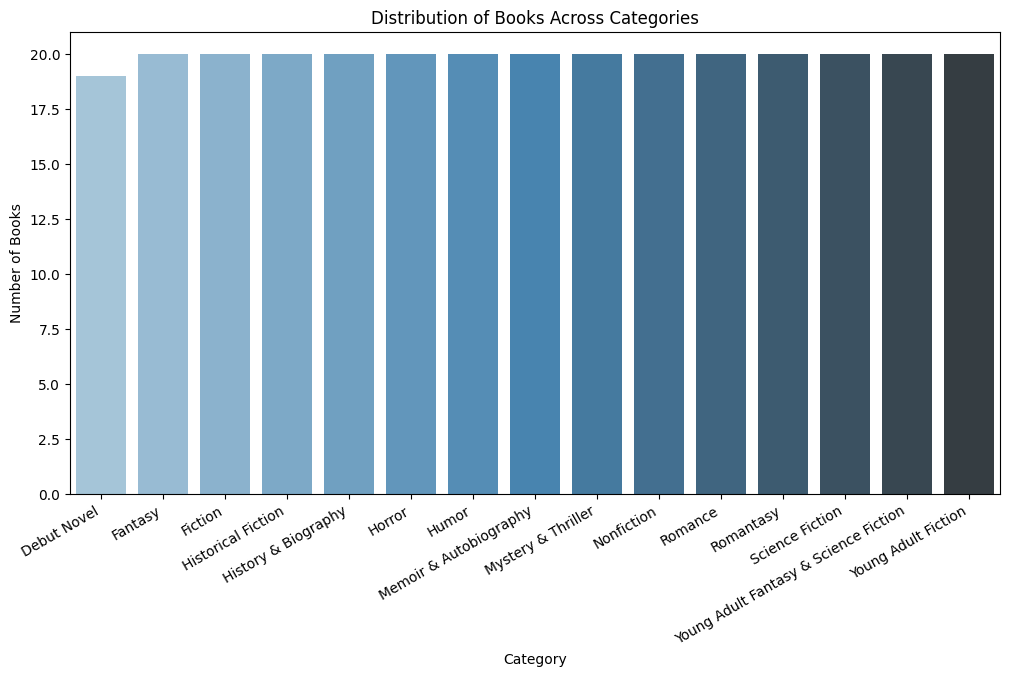

In [24]:
cat_counts = df['Readers Choice Category'].value_counts()
print(cat_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=cat_counts.index, y=cat_counts.values, palette = 'Blues_d')
plt.title('Distribution of Books Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.xticks(rotation=30, ha='right')
plt.show()

In [25]:
#Determine which column we want to aggregate
aggregations = {'Readers Choice Votes': 'sum',
                'Total Avg Rating': 'mean',
               'Number of Ratings': 'sum',
               'Number of Reviews': 'sum',
                'Number of Pages': 'median',
                'Kindle Price': 'median',
               }

#Group by book category
category_vote = df.groupby('Readers Choice Category').agg(aggregations).sort_values('Readers Choice Votes', ascending=False)

# Calculate the percentage of total votes, total ratings, and total reviews for each category
total_votes = category_vote['Readers Choice Votes'].sum()
total_ratings = category_vote['Number of Ratings'].sum()
total_reviews = category_vote['Number of Reviews'].sum()
percent_of_total_votes = (category_vote['Readers Choice Votes'] / total_votes) * 100
percent_of_total_ratings = (category_vote['Number of Ratings'] / total_ratings) * 100
percent_of_total_reviews = (category_vote['Number of Reviews'] / total_reviews) * 100

# Create new DataFrame of Votes, Ratings, and Reviews
result_df = pd.DataFrame({
    'Votes (sum)': category_vote['Readers Choice Votes'],
    '% Votes': percent_of_total_votes,
    'Avg Ratings': category_vote['Total Avg Rating'].round(2),
    'Number of Ratings': category_vote['Number of Ratings'],
    '% of Total Ratings': percent_of_total_ratings.round(2),
    'Number of Reviews': category_vote['Number of Reviews'],
    '% of Total Reviews': percent_of_total_reviews.round(2),
    'Median Pages': category_vote['Number of Pages'],
    'Median Kindle Price': category_vote['Kindle Price'].round(2)
    })

#Find the most voted category
max_voted_cat = result_df['Votes (sum)'].idxmax()
max_votes = result_df['Votes (sum)'].max()
avg_rat = result_df.loc[max_voted_cat, 'Avg Ratings']

#Find the most rated category
max_rated_cat = result_df['Number of Ratings'].idxmax()
max_rates = result_df['Number of Ratings'].max()
pct_max_rates = result_df['% of Total Ratings'].max()

#Find the most reviewed category
max_reviewed_cat = result_df['Number of Reviews'].idxmax()
max_reviews = result_df['Number of Reviews'].max()
pct_max_reviews = result_df['% of Total Reviews'].max()

#Print the result
print(f"The category '{max_voted_cat}' is The Most Voted Category of 2023, with {max_votes:,} votes")
print(f"The category '{max_rated_cat}' is The Most Rated Category of 2023, having an average rating of {format(avg_rat, '.2f')}, and number of ratings: {max_rates:,}, or {format(pct_max_rates, '.2f')}% of total ratings")
print(f"The category '{max_reviewed_cat}' is The Most Reviewed Category of 2023, with {max_reviews:,} number of reviews, or {format(pct_max_reviews, '.2f')}% of total reviews")

result_df

The category 'Romance' is The Most Voted Category of 2023, with 645,601 votes
The category 'Romance' is The Most Rated Category of 2023, having an average rating of 4.05, and number of ratings: 2,737,676, or 23.63% of total ratings
The category 'Romance' is The Most Reviewed Category of 2023, with 336,747 number of reviews, or 21.49% of total reviews


,Votes (sum),% Votes,Avg Ratings,Number of Ratings,% of Total Ratings,Number of Reviews,% of Total Reviews,Median Pages,Median Kindle Price
Readers Choice Category,,,,,,,,,
Romance,645601,10.981079,4.05,2737676,23.63,336747,21.49,398.0,6.99
Fiction,587718,9.996542,3.95,1288841,11.12,157445,10.05,328.0,14.99
Romantasy,572812,9.743005,4.07,1387830,11.98,203928,13.01,506.0,5.49
Mystery & Thriller,519745,8.840384,4.05,1673792,14.45,181312,11.57,365.5,14.99
Fantasy,456020,7.756480,4.10,523942,4.52,93625,5.97,407.5,14.73
Young Adult Fantasy & Science Fiction,400863,6.818311,4.04,543467,4.69,113098,7.22,440.0,10.99
Historical Fiction,390321,6.639001,4.14,692953,5.98,79846,5.09,368.0,12.99
Memoir & Autobiography,389374,6.622893,4.17,814014,7.03,99369,6.34,298.5,14.99
Young Adult Fiction,371283,6.315182,3.97,392355,3.39,73957,4.72,384.0,10.99


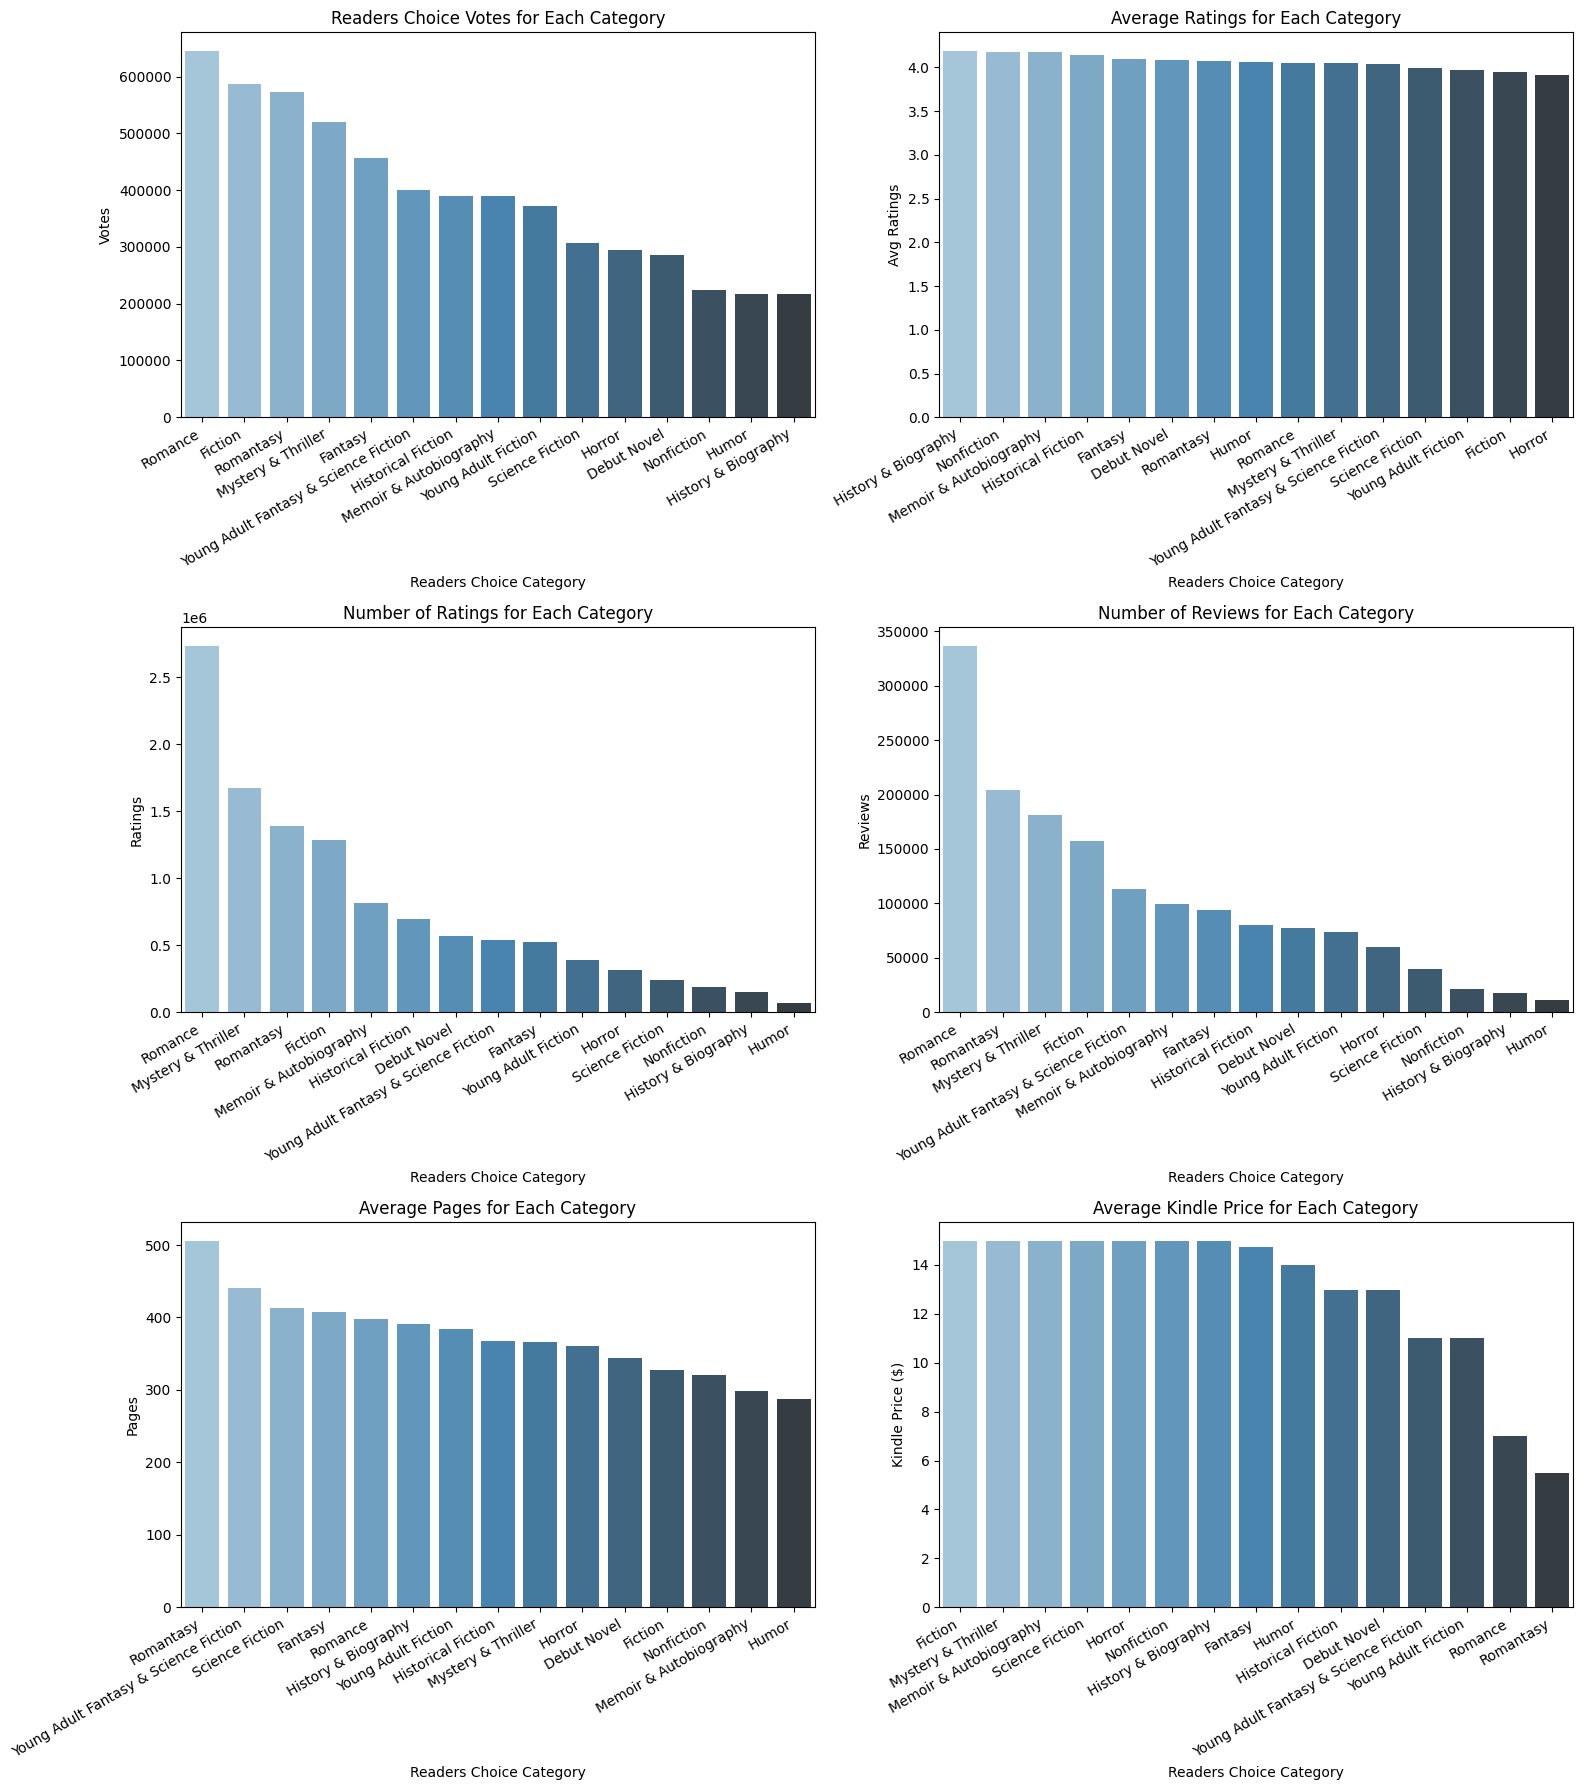

In [26]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18), sharey=False)

# First plot
sns.barplot(x=result_df.index, y=result_df['Votes (sum)'], palette='Blues_d', order=result_df.index, ax=axes[0, 0])
axes[0, 0].set_title('Readers Choice Votes for Each Category')
axes[0, 0].set_ylabel('Votes')
axes[0, 0].set_xticklabels(labels=result_df.index, rotation=30, ha='right')

# Second plot
result_df_sorted = result_df.sort_values(by='Avg Ratings', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['Avg Ratings'], palette='Blues_d', order=result_df_sorted.index, ax=axes[0, 1])
axes[0, 1].set_title('Average Ratings for Each Category')
axes[0, 1].set_ylabel('Avg Ratings')
axes[0, 1].set_xticklabels(labels=result_df_sorted.index, rotation=30, ha='right')

# Third plot
result_df_sorted = result_df.sort_values(by='Number of Ratings', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['Number of Ratings'], palette='Blues_d', order=result_df_sorted.index, ax=axes[1, 0])
axes[1, 0].set_title('Number of Ratings for Each Category')
axes[1, 0].set_ylabel('Ratings')
axes[1, 0].set_xticklabels(labels=result_df_sorted.index, rotation=30, ha='right')

# Fourth plot
result_df_sorted = result_df.sort_values(by='Number of Reviews', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['Number of Reviews'], palette='Blues_d', order=result_df_sorted.index, ax=axes[1, 1])
axes[1, 1].set_title('Number of Reviews for Each Category')
axes[1, 1].set_ylabel('Reviews')
axes[1, 1].set_xticklabels(labels=result_df_sorted.index, rotation=30, ha='right')

# Fifth plot
result_df_sorted = result_df.sort_values(by='Median Pages', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['Median Pages'], palette='Blues_d', order=result_df_sorted.index, ax=axes[2, 0])
axes[2, 0].set_title('Average Pages for Each Category')
axes[2, 0].set_ylabel('Pages')
axes[2, 0].set_xticklabels(labels=result_df_sorted.index, rotation=30, ha='right')

# Sixth plot
result_df_sorted = result_df.sort_values(by='Median Kindle Price', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['Median Kindle Price'], palette='Blues_d', order=result_df_sorted.index, ax=axes[2, 1])
axes[2, 1].set_title('Average Kindle Price for Each Category')
axes[2, 1].set_ylabel('Kindle Price ($)')
axes[2, 1].set_xticklabels(labels=result_df_sorted.index, rotation=30, ha='right')

plt.tight_layout()
plt.show()

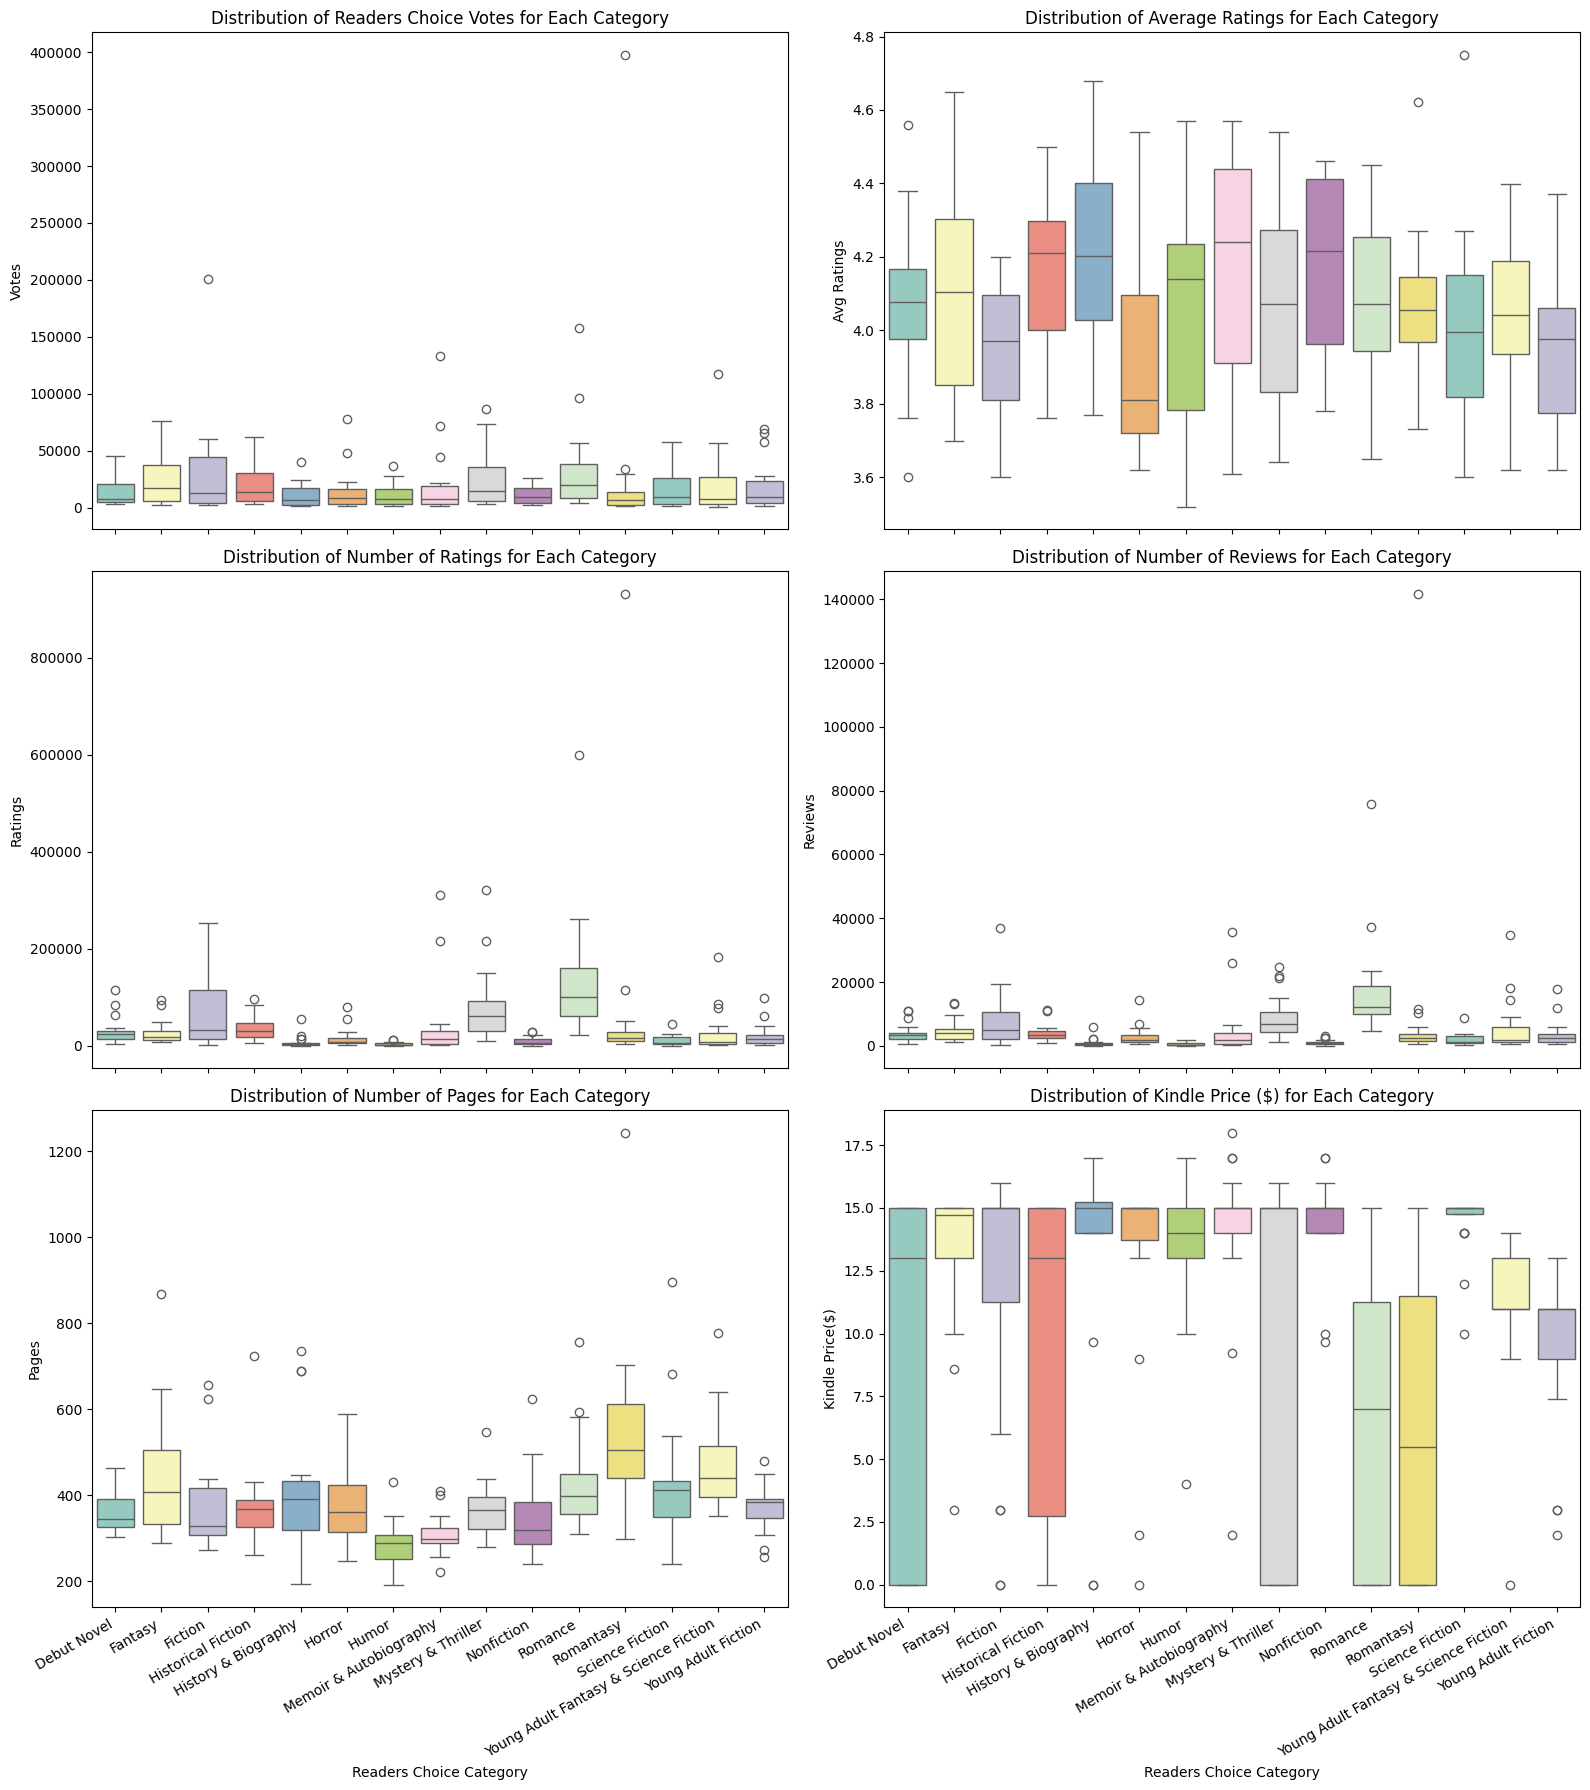

In [27]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18), sharey=False, sharex=True)

# First plot
sns.boxplot(data=df, x='Readers Choice Category', y='Readers Choice Votes', palette='Set3', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Readers Choice Votes for Each Category')
axes[0, 0].set_ylabel('Votes')

# Second plot
sns.boxplot(data=df, x='Readers Choice Category', y='Total Avg Rating', palette='Set3', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Average Ratings for Each Category')
axes[0, 1].set_ylabel('Avg Ratings')

# Third plot
sns.boxplot(data=df, x='Readers Choice Category', y='Number of Ratings', palette='Set3', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Number of Ratings for Each Category')
axes[1, 0].set_ylabel('Ratings')

# Fourth plot
sns.boxplot(data=df, x='Readers Choice Category', y='Number of Reviews', palette='Set3', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Number of Reviews for Each Category')
axes[1, 1].set_ylabel('Reviews')

# Fifth plot
sns.boxplot(data=df, x='Readers Choice Category', y='Number of Pages', palette='Set3', ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Number of Pages for Each Category')
axes[2, 0].set_ylabel('Pages')

# Sixth plot
sns.boxplot(data=df, x='Readers Choice Category', y='Kindle Price', palette='Set3', ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Kindle Price ($) for Each Category')
axes[2, 1].set_ylabel('Kindle Price($)')

for ax in axes[2, :]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

fig.tight_layout()
plt.show()

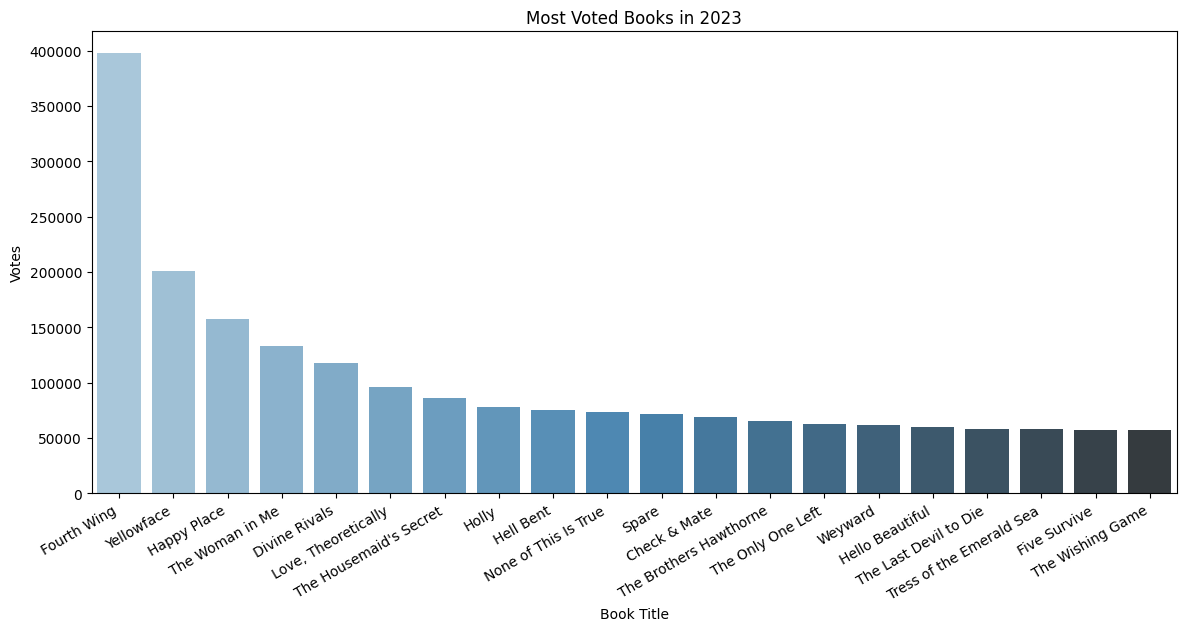

,Title,Readers Choice Category,Readers Choice Votes,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages
41,None of This Is True,Mystery & Thriller,73187,4.179688,215003,24754,384
61,"Love, Theoretically",Romance,96439,4.160156,256083,37318,389


In [29]:
most_voted_books = df[['Title', 'Readers Choice Category', 'Readers Choice Votes', 'Total Avg Rating', 'Number of Ratings', 'Number of Reviews', 'Number of Pages']].sort_values(by=['Readers Choice Votes', 'Number of Ratings', 'Number of Reviews'], ascending=False).head(20)

plt.figure(figsize=(14, 6))
sns.barplot(x=most_voted_books['Title'], y=most_voted_books['Readers Choice Votes'], data=most_voted_books, palette='Blues_d')
plt.title('Most Voted Books in 2023')
plt.xlabel('Book Title')
plt.ylabel('Votes')
plt.xticks(rotation=30, ha='right')
plt.show()

most_voted_books.sample(2)

In [31]:
max_votes_index = df.groupby('Readers Choice Category')['Readers Choice Votes'].idxmax()
titles_with_max_votes = df.loc[max_votes_index, ['Readers Choice Category', 'Title', 'Readers Choice Votes', 'Total Avg Rating', 'Number of Ratings', 'Number of Reviews', 'Number of Pages']].sort_values('Readers Choice Votes', ascending=False)
titles_with_max_votes.head()

,Readers Choice Category,Title,Readers Choice Votes,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages
80,Romantasy,Fourth Wing,397565,4.621094,930928,141668,500
0,Fiction,Yellowface,200722,3.869141,252189,37032,336
60,Romance,Happy Place,157687,4.050781,599665,75814,400
239,Memoir & Autobiography,The Woman in Me,132867,4.050781,215178,26056,277
160,Young Adult Fantasy & Science Fiction,Divine Rivals,117671,4.261719,183916,34829,357


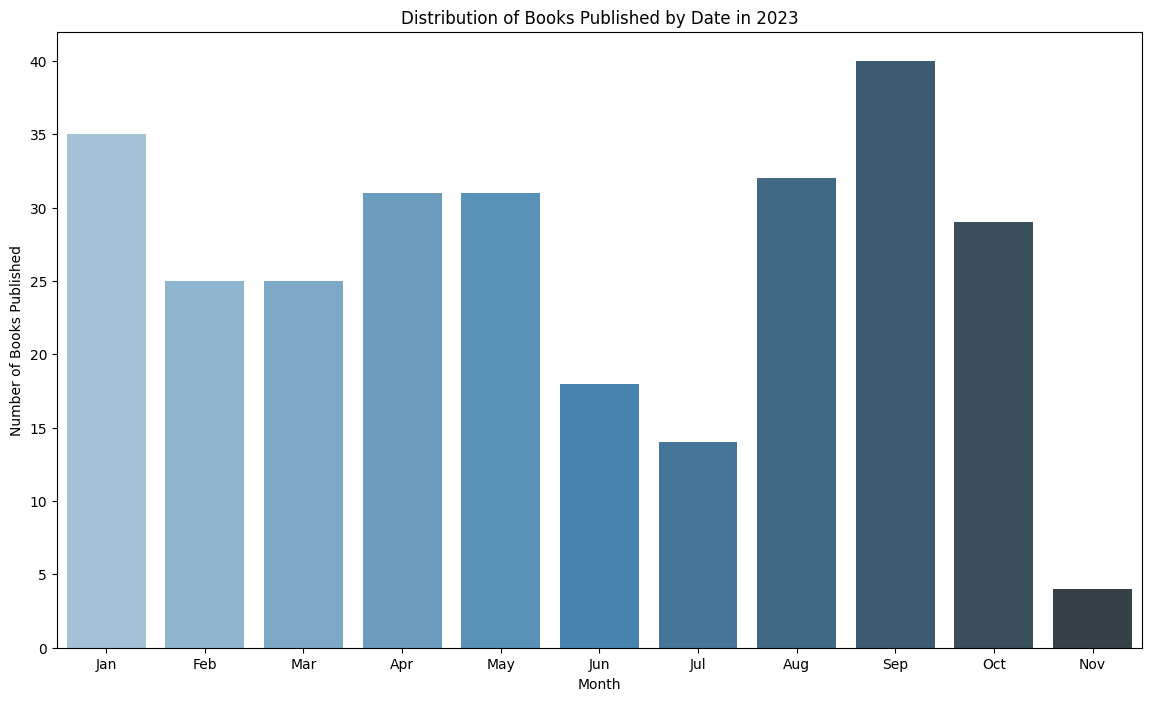

In [32]:
import calendar
df['First Published date'] = pd.to_datetime(df['First Published date'])

#Get only the books from year 2023.
books_2023 = df[df['First Published date'].dt.year == 2023]

#Count how many book released every month
books_per_month = books_2023.groupby(books_2023['First Published date'].dt.month)['Title'].count().reset_index()
books_per_month['Month'] = books_per_month['First Published date'].apply(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(14, 8))
sns.barplot(data=books_per_month, x='Month', y='Title', palette='Blues_d')
plt.title('Distribution of Books Published by Date in 2023')
plt.xlabel('Month')
plt.ylabel('Number of Books Published')
plt.show()

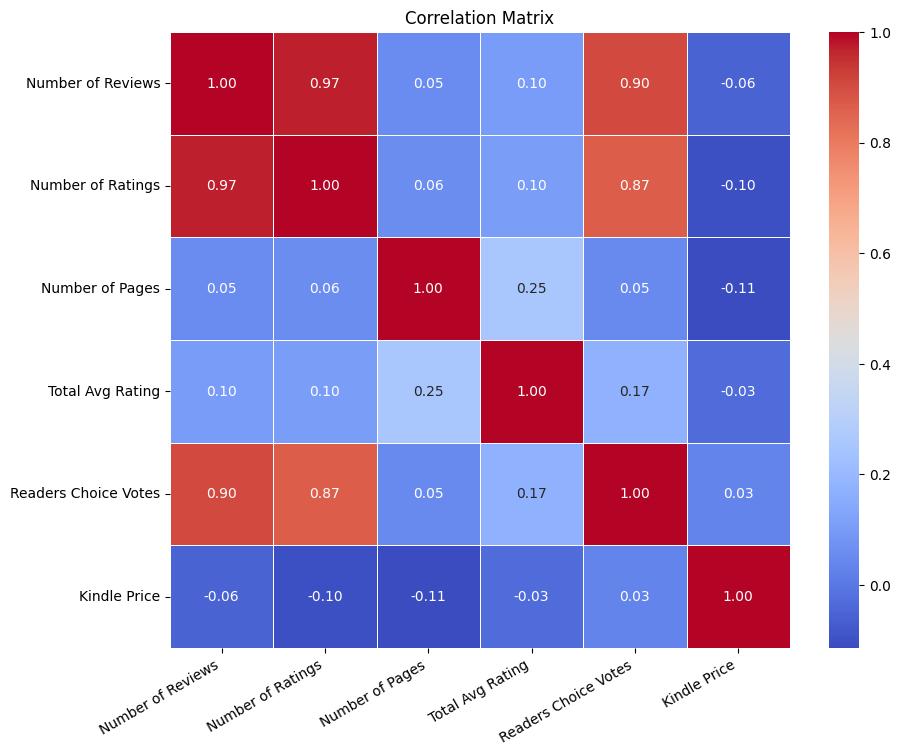

In [33]:
# Assign the columns
columns_of_interest = ['Number of Reviews', 'Number of Ratings', 'Number of Pages', 'Total Avg Rating', 'Readers Choice Votes', 'Kindle Price']

# Calculate the correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=30, ha='right')
plt.show()